# More on Pandas DataFrames
pandas DataFrames are a fundamental tool in Python for data manipulation and analysis. Understanding these core concepts is essential for effective data handling in scientific computing, especially for large multivariate datasets.


## DataFrame Basics and Key Components
- **Definition**: A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). `Pandas dataframes` are made of `pandas series` data structures. Each series is a column. They behave like `numpy arrays`.  
- **Creation**: DataFrames can be created from various data sources like lists, dictionaries, or reading from files (e.g., CSV, Excel). 
- **Rows and Columns**: DataFrames are composed of rows and columns, each row representing a record and each column a feature.
- **Index**: Each row has an index, which can be numeric, string, or datetime. It's crucial for data alignment and manipulation.
- **Data Types**: Columns can hold different types of data (integers, strings, floats, etc.).

In [2]:
# Sample dataframe
# Importing necessary libraries
import pandas as pd
import numpy as np

# Creating a DataFrame
# --------------------
# Example: Creating a DataFrame to store amino acid properties
# Start by creating a dictionary with amino acid molecular weights keyed to their corresponding amino acid name
amino_acids = {
    'AminoAcid': ['Alanine', 'Cysteine', 'Aspartic Acid', 'Glutamine'],
    'MolecularWeight': [89.1, 121.2, 133.1, 146.1],
    'pKa': [2.34, 1.96, 3.9, 2.17]
}
# Convert the dictionary to a dataframe
amino_acids_df = pd.DataFrame(amino_acids)
print("Amino Acids DataFrame:\n", amino_acids_df)

Amino Acids DataFrame:
        AminoAcid  MolecularWeight   pKa
0        Alanine             89.1  2.34
1       Cysteine            121.2  1.96
2  Aspartic Acid            133.1  3.90
3      Glutamine            146.1  2.17


## Some useful descriptive methods
The strength of dataframes are that the facilitate handling large, multivariate datasets. Here are some useful descriptive methods:
1. head() - View the first few rows of the DataFrame
2. tail() - View the last few rows of the DataFrame
3. describe() - Get a summary of statistics for numeric columns
4. info() - Get a concise summary of the DataFrame
5. mean() - Calculate the mean of each numeric column
6. median() - Calculate the median of each numeric column
    
**Note**: Because these are `methods`, you'll call them by appending them onto your dataframe of interest: i.e., dataframe.head()

In [5]:
# Print the first five lines of amino_acids_df
print(amino_acids_df.head())

# Try swapping out .head() with other methods. What does each one do?

       AminoAcid  MolecularWeight   pKa
0        Alanine             89.1  2.34
1       Cysteine            121.2  1.96
2  Aspartic Acid            133.1  3.90
3      Glutamine            146.1  2.17


## Data Manipulation, Merging, and Sorting
Above, we saw how to look at the data, pandas also maintains many powerful methods for manipulating the data, including:
- **Selection**: Accessing specific rows, columns, or cells using loc, iloc, or column names.
- **Filtering**: Extracting a subset of rows based on a condition.
- **Adding Columns**: Enhancing DataFrames by calculating new columns or adding data.
- **Aggregation**: Performing statistical operations like mean, median, sum, etc., on columns.
- **Merging**: Combining two DataFrames based on common columns.
- **Joining**: Linking DataFrames using their indexes.
- **Detection**: Identifying missing or NaN values in the DataFrame.
- **Filling**: Replacing missing values with specific values or statistical measures (mean, median).
- **Dropping**: Removing rows or columns with missing values.
- **Reading Data**: Loading data from various file formats into DataFrames.
- **Writing Data**: Exporting DataFrames to different file formats for storage or further analysis.

Molecular Weights:
 0     89.1
1    121.2
2    133.1
3    146.1
Name: MolecularWeight, dtype: float64
<class 'pandas.core.series.Series'>


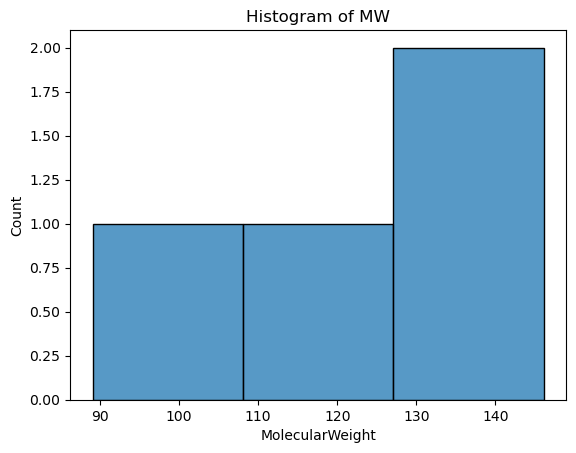

In [11]:
# Accessing specific columns
weights = amino_acids_df['MolecularWeight']
print("Molecular Weights:\n", weights)

# you may wonder: what kind of data type is 'weights'? Let's check..
print(type(weights))

# Plot a histogram of one of the columns using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(weights)
plt.title('Histogram of MW')
plt.show()

## Exercise 1: Accessing Columns and Plotting
- Create a series containing only the pKa values from the amino_acids_df
- Plot a histogram of the series

In [ ]:
# Your answer Here

## Conditional Filtering
Creating new series or dataframe using only the data you want is extremely useful. Here's an example: 

In [13]:
# Filtering: Selecting amino acids with a molecular weight greater than 120
heavy_amino_acids = amino_acids_df[amino_acids_df['MolecularWeight'] > 120]
print("Heavy Amino Acids:\n", heavy_amino_acids)

Heavy Amino Acids:
        AminoAcid  MolecularWeight   pKa
1       Cysteine            121.2  1.96
2  Aspartic Acid            133.1  3.90
3      Glutamine            146.1  2.17


In [ ]:
# Other useful Examples:
# Accessing rows using loc. The value refers to the row being isolated. Try a different row. What happens?
alanine_data = amino_acids_df.loc[0]
print("Data for Alanine:\n", alanine_data)

# Adding a new column: Calculating the molar mass of amino acids
amino_acids_df['MolarMass'] = amino_acids_df['MolecularWeight'] * 1.66054
print("Amino Acids with Molar Mass:\n", amino_acids_df)

# Aggregation: Calculating average molecular weight
average_weight = amino_acids_df['MolecularWeight'].mean()
print("Average Molecular Weight:", average_weight)

## Some other useful methods for manipulation, merging, and sorting

1. groupby() - Group DataFrame using a mapper or by a series of columns

2. sort_values() - Sort by the values along either axis

3. drop_duplicates() - Remove duplicate rows

4. to_csv() - Write DataFrame to a comma-separated values (csv) file: **df.to_csv('filename.csv')**

5. read_csv() - Read a comma-separated values (csv) file into DataFrame: **pd.read_csv('filename.csv')**

6. isnull() - Detect missing values

7. fillna() - Fill NA/NaN values using a specified method: **df.fillna(value=0)**

8. apply() - Apply a function along an axis of the DataFrame: **df.apply(lambda x: x * 2)**

9. merge() - Merge DataFrame or named Series objects with a database-style join: **pd.merge(df1, df2, on='key')**

10. pivot_table() - Create a spreadsheet-style pivot table as a DataFrame: **df.pivot_table(values='Column2', index='Column1', aggfunc='mean')**

In [ ]:


# DataFrame Merging and Joining
# ------------------------------
# Example: Merging with another DataFrame
# Assume we have another DataFrame with solubility data
solubility_data = pd.DataFrame({
    'AminoAcid': ['Alanine', 'Cysteine', 'Glutamine'],
    'Solubility': [167, 200, 180]  # Solubility in g/L
})
merged_df = pd.merge(amino_acids_df, solubility_data, on='AminoAcid', how='left')
print("Merged DataFrame with Solubility:\n", merged_df)

# Handling Missing Data
# ----------------------
# Filling missing values with a default value (e.g., average solubility)
merged_df['Solubility'].fillna(merged_df['Solubility'].mean(), inplace=True)
print("DataFrame with Missing Values Handled:\n", merged_df)

## Some additional pandas functions
These are particularly useful with dealing with very large datasets (which is where DataFrames really shine)

In [ ]:
# Check the first five rows and column headers (useful for large dataframes)
amino_acids_df.head()
# Also try, 
#amino_acids_df.tail()
# What does this do?

In [ ]:
# Descriptive statistics
amino_acids_df.describe()

# Also try amino_acids_df.info()

# Exercises

## Exercise 1: DataFrame Creation
- **Task**: Create a DataFrame for storing data about different enzymes, including their names, optimal pH, and temperature.
- **Hint**: Define a dictionary with enzyme information and convert it into a DataFrame using `pd.DataFrame()`.

## Exercise 2: Data Access and Manipulation
- **Task**: From the enzyme DataFrame, select and print only the names and optimal temperatures of enzymes.
- **Hint**: Use DataFrame indexing to select specific columns.

## Exercise 3: Filtering Data
- **Task**: Filter and display enzymes that operate at a pH greater than 7.
- **Hint**: Use a boolean condition to filter rows based on pH values.

## Exercise 4: Adding and Computing a New Column
- **Task**: Add a new column to the enzyme DataFrame that indicates whether the enzyme is thermophilic (optimal temperature > 60°C).
- **Hint**: Use a lambda function and `apply()` method to create the new column based on temperature.

## Exercise 5: Merging DataFrames
- **Task**: Assume you have another DataFrame with enzyme inhibition data. Merge it with the enzyme DataFrame based on enzyme names.
- **Hint**: Use `pd.merge()` function and specify the 'name' column as the key.

## Exercise 6: Handling Missing Data
- **Task**: In the merged DataFrame, fill any missing inhibition data with the average inhibition value.
- **Hint**: Use `fillna()` method on the DataFrame, replacing NaN values withng and analysis. Good luck!


In [ ]:
# Your Answer Here

## Solutions

In [ ]:
# Importing necessary libraries
import pandas as pd

# Exercise 1: DataFrame Creation
enzymes_dict = {
    'Name': ['Lipase', 'Amylase', 'Protease'],
    'Optimal_pH': [8.0, 7.0, 6.5],
    'Optimal_Temperature': [37, 67, 50]  # in Celsius
}
enzymes_df = pd.DataFrame(enzymes_dict)
print("Enzymes DataFrame:\n", enzymes_df)

# Exercise 2: Data Access and Manipulation
enzyme_temp = enzymes_df[['Name', 'Optimal_Temperature']]
print("Enzymes and their Optimal Temperatures:\n", enzyme_temp)

# Exercise 3: Filtering Data
alkaline_enzymes = enzymes_df[enzymes_df['Optimal_pH'] > 7]
print("Alkaline Enzymes:\n", alkaline_enzymes)

# Exercise 4: Adding and Computing a New Column
enzymes_df['Thermophilic'] = enzymes_df['Optimal_Temperature'].apply(lambda x: x > 60)
print("Enzymes DataFrame with Thermophilic Column:\n", enzymes_df)

# Exercise 5: Merging DataFrames
# Assuming another DataFrame with inhibition data
inhibition_data = pd.DataFrame({
    'Name': ['Lipase', 'Amylase'],
    'Inhibition': [50, 70]  # Inhibition in percentage
})
merged_df = pd.merge(enzymes_df, inhibition_data, on='Name', how='left')
print("Merged DataFrame with Inhibition Data:\n", merged_df)

# Exercise 6: Handling Missing Data
merged_df['Inhibition'].fillna(merged_df['Inhibition'].mean(), inplace=True)
print("Merged DataFrame with Missing Data Handled:\n", merged_df)
